# CE 295 - Energy Systems and Control
## Ursan Tchouteng Njike, SID 3033216253
## Prof. Daniel Arnold
## Due Date 02/22/2021

## Ursan_Tchouteng_Njike_HW2.ipynb

***
## HW 2 : State Estimation in Geothermal Heat Pump Drilling
***
## **Problem 1: Dynamic System Modeling**

**a)**<br>
The modeling objective is to determine the angular velocity of the bit<br>
**Controllable input:** $T(t)$ <br>
**Uncontrollable input:** $T_f(t)$ <br>
**Measured output:** $\omega_T(t)$ <br>
**Performance output:** $\omega_B(t)$ <br>
**Parameters:** $k, b, J_T, K_B$<br>
<br>
**b)**<br>$T(t)-b\omega_T(t)-k[\theta_T(t)-\theta_B(t)] = J_T\dot{\omega}_T(t)$ <br>
$-b\omega_B(t)-T_f(t)-k[\theta_B(t)-\theta_T(t)]=J_B\dot{\omega}_B(t)$ <br>
$\dot{\theta}_T(t)=\omega_T(t)$<br>
$\dot{\theta}_B(t)=\omega_B(t)$<br>
<br>
**c)**<br>
$\frac{d}{dt}\begin{bmatrix}\theta_T \\ \theta_B \\ \omega_T \\ \omega_B\end{bmatrix}=\begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k}{J_T} & \frac{k}{J_T} & -\frac{b}{J_T} & 0 \\ \frac{k}{J_B} & -\frac{k}{J_B} & 0 & -\frac{b}{J_B}\end{bmatrix}\begin{bmatrix}\theta_T \\ \theta_B \\ \omega_T \\ \omega_B\end{bmatrix}+\begin{bmatrix} 0 & 0 \\ 0 & 0 \\ \frac1{J_T} & 0 \\ 0 & -\frac{1}{J_B}\end{bmatrix}\begin{bmatrix}T \\ T_f\end{bmatrix}$ <br>
<br>
$ \omega_B = \begin{bmatrix} 0 & 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}\theta_T \\ \theta_B \\ \omega_T \\ \omega_B\end{bmatrix}$
<br><br>
$A=\begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k}{J_T} & \frac{k}{J_T} & -\frac{b}{J_T} & 0 \\ \frac{k}{J_B} & -\frac{k}{J_B} & 0 & -\frac{b}{J_B}\end{bmatrix} \space\space B=\begin{bmatrix} 0 & 0 \\ 0 & 0 \\ \frac1{J_T} & 0 \\ 0 & -\frac{1}{J_B}\end{bmatrix} \space\space C=\begin{bmatrix} 0 & 0 & 0 & 1 \end{bmatrix}$

## **Problem 2 - Observability Analysis**
**Part a**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import interp
from scipy import signal
%matplotlib inline
from __future__ import division
import pandas as pd
import control # Read http://python-control.sourceforge.net/manual/

fs = 15 # Font Size for plots

# Drill String Parameters

J_T = 100  # Table/top rotational inertia
J_B = 25   # Bottom/bit rotational inertia
k = 2      # Spring constant
b =  5    # Drag coefficient

In [2]:
# State space matrices
A4 = np.matrix([[ 0, 0, 1, 0], [ 0, 0, 0, 1], [ -k/J_T, k/J_T, -b/J_T, 0], [ k/J_B, -k/J_B, 0, -b/J_B]])
B4 = np.matrix([[ 0, 0], [ 0, 0], [ 1/J_T, 0], [ 0, -1/J_B]])
C4 = np.matrix([[0,0,0,1]])

# Compute observability Matrix for 4-state system and rank
O4 = np.matrix([C4.tolist()[0],(C4*A4).tolist()[0],(C4*A4**2).tolist()[0],(C4*A4**3).tolist()[0]])
print('O4= ')
print(O4)
print('\nRank of Observability Matrix for four-state system')
print(np.linalg.matrix_rank(O4))



O4= 
[[ 0.      0.      0.      1.    ]
 [ 0.08   -0.08    0.     -0.2   ]
 [-0.016   0.016   0.08   -0.04  ]
 [-0.0048  0.0048 -0.02    0.024 ]]

Rank of Observability Matrix for four-state system
3


All the states are not observable because rank(O4)=3, whereas we have 4 states.

**Part b**
<br>
$\frac{d}{dt}\begin{bmatrix}\theta \\ \omega_T \\ \omega_B\end{bmatrix}=\begin{bmatrix} 0 & 1 & -1 \\ -0.02 & -0.05 & 0 \\ 0.08 & 0 & -0.2\end{bmatrix}\begin{bmatrix}\theta \\ \omega_T \\ \omega_B\end{bmatrix}+\begin{bmatrix} 0 & 0 \\0.01 & 0 \\ 0 & -0.04\end{bmatrix}\begin{bmatrix}T \\ T_f\end{bmatrix}$ <br>
<br>
$ \omega_B = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}\theta \\ \omega_T \\ \omega_B\end{bmatrix}$
<br><br>
$A=\begin{bmatrix} 0 & 1 & -1 \\ -0.02 & -0.05 & 0 \\ 0.08 & 0 & -0.2\end{bmatrix} \space\space B=\begin{bmatrix} 0 & 0 \\0.01 & 0 \\ 0 & -0.04\end{bmatrix} \space\space C=\begin{bmatrix} 0 & 0 & 1 \end{bmatrix}$

**Part c**

In [3]:
# New A Matrix, for 3-state system
A = np.matrix([[ 0, 1, -1], [ -k/J_T, -b/J_T, 0], [ k/J_B, 0, -b/J_B]])
B = np.matrix([[ 0, 0], [ 1/J_T, 0], [ 0, -1/J_B]])
C = np.matrix([[0,0,1]])

# Observability Matrix for 3-state system and rank
O = np.matrix([C.tolist()[0],(C*A).tolist()[0],(C*A**2).tolist()[0]])

print('O= ')
print(O)
print('\nRank of Observability Matrix for three-state system')
print(np.linalg.matrix_rank(O))

O= 
[[ 0.     0.     1.   ]
 [ 0.08   0.    -0.2  ]
 [-0.016  0.08  -0.04 ]]

Rank of Observability Matrix for three-state system
3


All the states are observable since the rank(O)=3, and we have 3 states

## **Problem 3 - Measurement Data**

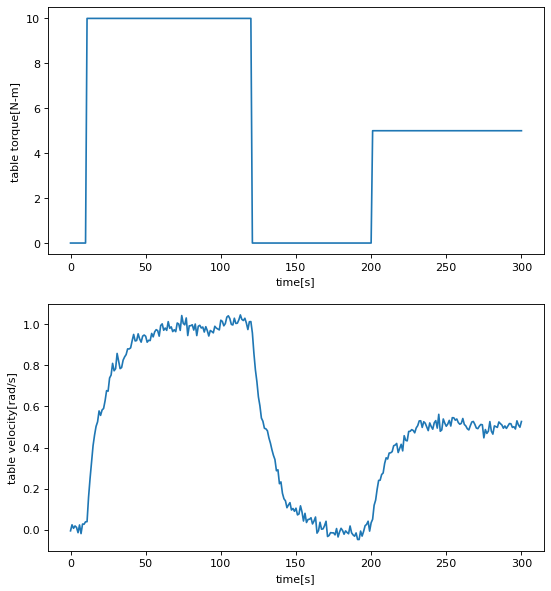

In [4]:
## Load Data
data=np.asarray(pd.read_csv("HW2_Data.csv",header=None))

t = data[:,0]      # t   : time vector [sec]
y_m = data[:,1]    # y_m : measured table velocity [radians/sec]
Torq = data[:,2]   # Torq: table torque [N-m]
omega_B_true = data[:,3]    # \omega_B : true rotational speed of bit [radians/sec]

# Plot Data
plt.figure(num=1, figsize=(8, 9), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2,1,1)
plt.plot(t, Torq)
# Plot table torque

plt.xlabel('time[s]')
plt.ylabel('table torque[N-m]')

plt.subplot(2,1,2)
plt.plot(t, y_m)
# Plot measured table velocity

plt.xlabel('time[s]')
plt.ylabel('table velocity[rad/s]')

plt.show()

## **Problem 4 - Luenberger Observer**

**Part a and b**

In [5]:
import scipy
from control import acker

# Eigenvalues of open-loop system
print('Eigenvalues of open-loop system:')
lam_A,evec = scipy.linalg.eig(A)
print(lam_A)

# Desired poles of estimation error system
#   They should have negative real parts
#   Complex conjugate pairs
lam_luen = [ -0.417+0.3J, -0.417-0.3J, -0.416]
print('\nI got the eigenvalues of (A-LC) by multiplying the Real part of the eigenvalues of A by 5')
print('\nThe eigen values of A-LC are: ', lam_luen)

# Compute observer gain (See Remark 3.1 in Notes. Use "acker" command)
L = acker(A.T,C.T, lam_luen).T
print('\nL=')
print(L)


Eigenvalues of open-loop system:
[-0.08338525+0.29860789j -0.08338525-0.29860789j -0.08322949+0.j        ]

I got the eigenvalues of (A-LC) by multiplying the Real part of the eigenvalues of A by 5

The eigen values of A-LC are:  [(-0.417+0.3j), (-0.417-0.3j), -0.416]

L=
[[5.6354125 ]
 [0.74045217]
 [1.        ]]


**Luenberger Observer equations:**<br><br>
$\dot{\hat{x}}(t)=A\hat{x}(t)+Bu(t)+L(y_m(t)-\hat{y})$<br>
$\hat{y}=C\hat{x}$
<br><br>
**Part c**<br>
$\dot{\hat{x}}=\begin{bmatrix} 0 & 1 & -1 \\ -0.02 & -0.05 & 0 \\ 0.08 & 0 & -0.2\end{bmatrix}\hat{x}+\begin{bmatrix} 0 & 0 \\0.01 & 0 \\ 0 & -0.04\end{bmatrix}\begin{bmatrix}T \\ T_f\end{bmatrix} + \begin{bmatrix}5.6354125 \\ 0.74045217 \\ 1 \end{bmatrix}[y - \hat{y}]$ <br>

$\implies \dot{\hat{x}}=\bigg(\begin{bmatrix} 0 & 1 & -1 \\ -0.02 & -0.05 & 0 \\ 0.08 & 0 & -0.2\end{bmatrix} - \begin{bmatrix}5.6354125 \\ 0.74045217 \\ 1 \end{bmatrix}\begin{bmatrix} 0 & 0 & 1 \end{bmatrix}\bigg)\hat{x} + \begin{bmatrix} 0 & 0 & 5.6354125 \\ 0.01 & 0 & 0.74045217 \\ 0 & -0.04 & 1 \end{bmatrix} \begin{bmatrix}T \\ T_f \\ y\end{bmatrix}$ <br>

$\implies \dot{\hat{x}}=\begin{bmatrix} 0 & 1 & -6.6354125 \\ -0.02 & -0.05 & -0.74045217 \\ 0.08 & 0 & -1.2\end{bmatrix}\hat{x} + \begin{bmatrix} 0 & 0 & 5.6354125 \\ 0.01 & 0 & 0.74045217 \\ 0 & -0.04 & 1 \end{bmatrix} \begin{bmatrix}T \\ T_f \\ y\end{bmatrix}$

Since $T_f$ is not measured,<br>
$\implies \dot{\hat{x}}=\begin{bmatrix} 0 & 1 & -6.6354125 \\ -0.02 & -0.05 & -0.74045217 \\ 0.08 & 0 & -1.2\end{bmatrix}\hat{x} + \begin{bmatrix} 0 & 5.6354125 \\ 0.01 & 0.74045217 \\ 0 & 1 \end{bmatrix} \begin{bmatrix}T \\ y\end{bmatrix}$

<br>
$ \hat{y} = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}\hat{x}$
<br><br>
Therefore,<br>
$A_{lobs} = \begin{bmatrix} 0 & 1 & -6.6354125 \\ -0.02 & -0.05 & -0.74045217 \\ 0.08 & 0 & -1.2\end{bmatrix} \space \space B_{lobs} = \begin{bmatrix} 0 & 5.6354125 \\ 0.01 & 0.74045217 \\ 0 & 1 \end{bmatrix} \space \space C_{lobs} = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}$

<br>**Part d**

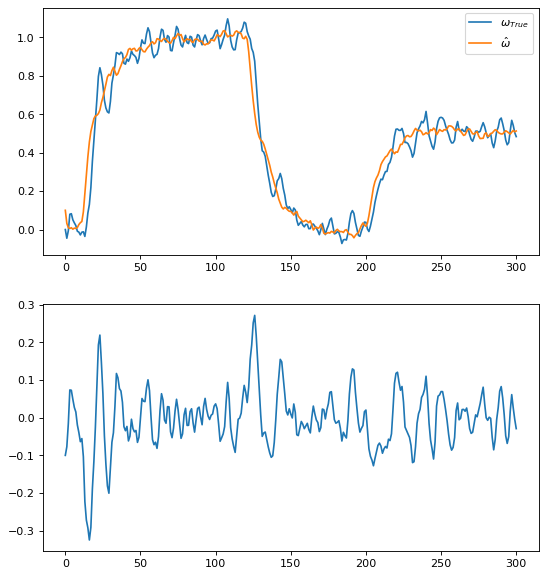

In [6]:

# State-space Matrices for Luenberger Observer
A_lobs =  A - L*C
B_lobs =  np.matrix([[0, 5.6354125],
                    [1/J_T, 0.74045217],
                    [0, 1]])
C_lobs =  np.matrix([0,0,1])
D_lobs =  np.matrix([[0, 0]])

sys_lobs = signal.lti( A_lobs, B_lobs, C_lobs, D_lobs)

# Inputs to observer
u = (np.array([Torq.tolist(), y_m.tolist()])).T

# Initial Conditions
x_hat0 = [ 0.1, 0.1, 0.1]

# Simulate Response
tsim, y, x_hat = signal.lsim(sys_lobs, U=u, T=t, X0=x_hat0)

# Parse states
theta_hat = x_hat[:,0]
omega_T_hat = x_hat[:,1]
omega_B_hat = x_hat[:,2]

# Plot Results
plt.figure(num=1, figsize=(8, 9), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2,1,1)
# Plot true and estimated bit velocity
plt.plot(t, omega_B_true, label='$\omega_{True}$')
plt.plot(t, omega_B_hat, label='$\hat{\omega}$')
plt.legend()

plt.subplot(2,1,2)
# Plot error between true and estimated bit velocity
plt.plot(t, omega_B_true-omega_B_hat)


In [7]:
import math

lam_A_lobs,evec = scipy.linalg.eig(A_lobs)
print('The A_lobs eigenvalues are:')
print(lam_A_lobs)

sqError=(omega_B_true-omega_B_hat)**2
RMSE=math.sqrt(sqError.mean())
print('\nThe RMSE(root mean square error) is:')
print(RMSE)

The A_lobs eigenvalues are:
[-0.417+0.3j -0.417-0.3j -0.416+0.j ]

The RMSE(root mean square error) is:
0.07796473515991012


## Problem 5 - Kalman Filter

**Part a**<br>
$\dot{\hat{x}}(t) = A\hat{x}(t) + Bu(t) + L(t)[y_m - \hat{y}]$<br>
$\hat{y} = C\hat{x}(t)$<br>
$L(t)=\Sigma(t)C^TN^{-1}$<br>
$\dot{\Sigma}(t)=\Sigma(t)A^T + A\Sigma(t) + W -\Sigma(t)C^TN^{-1}C\Sigma(t)$

**Part b**

W was guessed as<br>
$W=\begin{bmatrix} 0.02 & 0 & 0 \\ 0 & 0.005 & 0 \\ 0 & 0 & 0.02\end{bmatrix}$
#### Noise Covariances

In [8]:
B = np.matrix([[0],
               [1/J_T],
               [0]])
W = np.diag([0.02,0.005,0.02]) #You design this one. 
N = 0.02
Sig0 = np.matrix([[1,0,0],
                  [0,1,0],
                  [0,0,1]]) 

# Initial Condition
x_hat0 = [ 0,  0,  0]
states0 = np.r_[x_hat0, np.squeeze(np.asarray(Sig0.reshape(9,1)))]

**Part c**

<ipython-input-9-cef5cef47fc1>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  iTorq = interp(it, t, Torq)
<ipython-input-9-cef5cef47fc1>:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  iy_m = interp(it, t, y_m)


Kalman Filter RMSE: 0.07072209975886003 rad/s


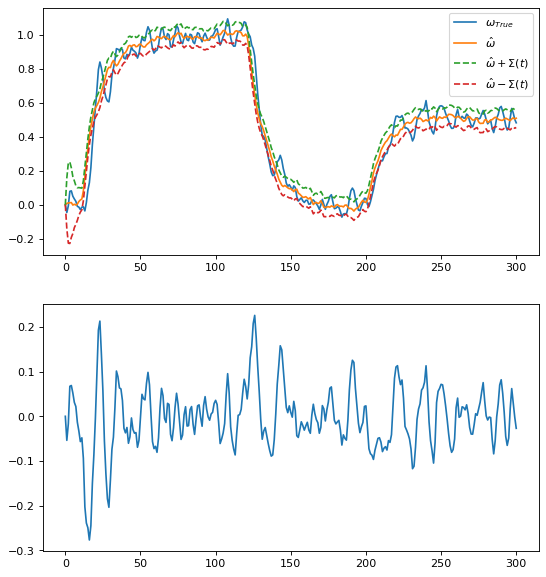

In [9]:
L_t=[]
# Ordinary Differential Equation for Kalman Filter
def ode_kf(z,it):
    
    # Parse States
    x_hat = np.matrix(z[:3]).T
    Sig = np.matrix((z[3:]).reshape(3,3))    
    
    # Interpolate input signal data
    iTorq = interp(it, t, Torq)
    iy_m = interp(it, t, y_m)
    
    # Compute Kalman Gain
    L = Sig*C.T*N**(-1)
    L_t.append(L)
    
    # Kalman Filter
    x_hat_dot = (A-L*C)*x_hat + B*iTorq + L*iy_m
    
    # Riccati Equation
    Sig_dot = Sig*A.T + A*Sig + W - Sig*C.T*N**(-1)*C*Sig
    
    # Concatenate LHS
    z_dot = np.r_[x_hat_dot, Sig_dot.reshape(9,1)]
    return(np.squeeze(np.asarray(z_dot)))


# Integrate Kalman Filter ODEs
z = odeint(ode_kf, states0, t)

# Parse States
theta_hat = z[:,0]
omega_T_hat = z[:,1]
omega_B_hat = z[:,2]
Sig33 = z[:,3:11].min(axis=1)     # Parse out the (3,3) element of Sigma only!

omega_B_tilde = omega_B_true - omega_B_hat
omega_B_hat_upperbound = omega_B_hat + np.sqrt(Sig33)
omega_B_hat_lowerbound = omega_B_hat - np.sqrt(Sig33)

RMSE = np.sqrt(np.mean(np.power(omega_B_tilde,2)))
print('Kalman Filter RMSE: ' + str(RMSE) + ' rad/s')


# Plot Results
plt.figure(num=3, figsize=(8, 9), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2,1,1)
#   Plot true and estimated bit velocity
#   Plot estimated bit velocity plus/minus one sigma
plt.plot(t, omega_B_true, label='$\omega_{True}$')
plt.plot(t, omega_B_hat, label='$\hat{\omega}$')
plt.plot(t, omega_B_hat_upperbound, '--', label='$\hat{\omega} + \Sigma(t)$')
plt.plot(t, omega_B_hat_lowerbound, '--', label='$\hat{\omega} - \Sigma(t)$')
plt.legend()

plt.subplot(2,1,2)
#   Plot error between true and estimated bit velocity
plt.plot(t, omega_B_tilde)

plt.show()



**Part d**

In [11]:
print('L at t=300 is')
print(L_t[-1])

E=A-np.matrix(L_t[-1])*C
lam_E,evec = scipy.linalg.eig(E)
print('\nThe eigenvalues of (A-LC) at t=300:')
print(lam_E)


L at t=300 is
[[1.70074057]
 [0.14868133]
 [0.94547741]]

The eigenvalues of (A-LC) at t=300:
[-0.93360875+0.j         -0.13093433+0.17806304j -0.13093433-0.17806304j]


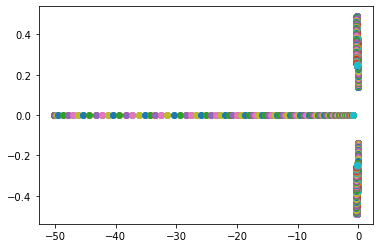

In [ ]:

import time
from IPython import display
E_t=[]
lam_E_t=[]
print('\nAnimation for the evolution of (A-LC)\'s eigenvalue')

for i in range(len(L_t)):
    E_t.append(A-np.matrix(L_t[i])*C)
    lam_E_t.append(0)
    lam_E_t[i],evec = scipy.linalg.eig(E_t[i])
    x=np.real(lam_E_t[i])
    y=np.imag(lam_E_t[i])
    plt.scatter(x,y)
    display.clear_output(wait=True)
    display.display(plt.gcf())

## Problem 6 - Extended Kalman Filter

#### New nonlinear spring parameters

<ipython-input-12-502e7bf18c79>:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  iTorq = interp(it, t, Torq)
<ipython-input-12-502e7bf18c79>:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  iy_m = interp(it, t, y_m)


Extended Kalman Filter RMSE: 0.050251936129068815 rad/s


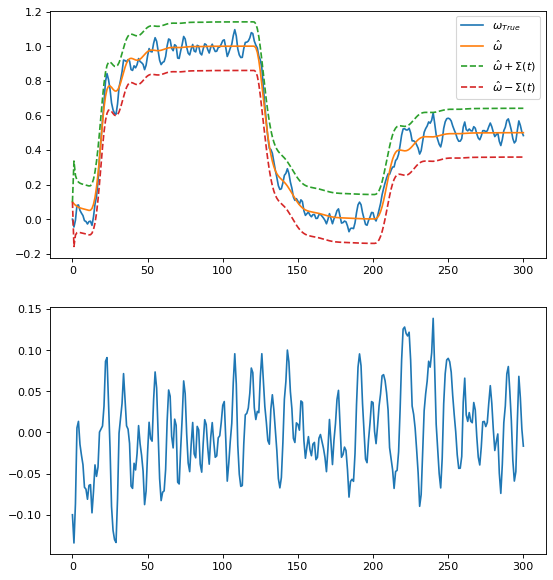

In [12]:

k1 = 2
k2 = 0.25

# Noise Covariances
W = np.diag([0.02,0.005,0.02]) #You design this one. 
N = 0.02
Sig0 = np.matrix([[1,0,0],
                  [0,1,0],
                  [0,0,1]])

# Initial Condition
x_hat0 = [ 0.1, 0.1 , 0.1 ]
states0 = np.r_[x_hat0, np.squeeze(np.asarray(Sig0.reshape(9,1)))]

# Ordinary Differential Equation for Kalman Filter
def ode_ekf(z,it):
    
    # Parse States
    theta_hat = z[0]
    omega_T_hat = z[1]
    omega_B_hat = z[2]
    Sig = np.matrix((z[3:]).reshape(3,3))
    
    # Interpolate input signal data
    iTorq = interp(it, t, Torq)
    iy_m = interp(it, t, y_m)
    
    # Compute Jacobians
    F = np.matrix([[0, 1, -1],
                   [-k1-3*k2*z[0]**2, -b, 0],
                   [k1+3*k2*z[0]**2, 0, b]]) # YOU DERIVE THESE
    H = np.matrix([0,0,1])# YOU DERIVE THESE
    
    # Compute Kalman Gain
    L = Sig*H.T*N**(-1)
    
    # Compute EKF system matrices
    y_hat = omega_T_hat
    
    theta_hat_dot = z[1]-z[2]
    omega_T_hat_dot = (iTorq - b*z[1] - (k1*z[0] + k2*z[0]**3))/J_T
    omega_B_hat_dot = (k1*z[0] + k2*z[0]**3 - b*z[2])/J_B
    
    # Riccati Equation
    Sig_dot = Sig*F.T + F*Sig + W - Sig*H.T*N**(-1)*H*Sig
    
    # Concatenate LHS
    z_dot = np.r_[[[theta_hat_dot], [omega_T_hat_dot], [omega_B_hat_dot]], Sig_dot.reshape(9,1)]
    
    return(np.squeeze(np.asarray(z_dot)))


# Integrate Extended Kalman Filter ODEs
z = odeint(ode_ekf, states0, t)

# Parse States
theta_hat = z[:,0]
omega_T_hat = z[:,1]
omega_B_hat = z[:,2]
Sig33 = abs(z[:,3:12].min(axis=1))

omega_B_tilde = omega_B_true - omega_B_hat
omega_B_hat_upperbound = omega_B_hat + np.sqrt(Sig33)
omega_B_hat_lowerbound = omega_B_hat - np.sqrt(Sig33)

RMSE = np.sqrt(np.mean(np.power(omega_B_tilde,2)))
print('Extended Kalman Filter RMSE: ' + str(RMSE) + ' rad/s')


# Plot Results
plt.figure(num=3, figsize=(8, 9), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2,1,1)
#   Plot true and estimated bit velocity
#   Plot estimated bit velocity plus/minus one sigma
plt.plot(t, omega_B_true, label='$\omega_{True}$')
plt.plot(t, omega_B_hat, label='$\hat{\omega}$')
plt.plot(t, omega_B_hat_upperbound, '--', label='$\hat{\omega} + \Sigma(t)$')
plt.plot(t, omega_B_hat_lowerbound, '--', label='$\hat{\omega} - \Sigma(t)$')
plt.legend()

plt.subplot(2,1,2)
#   Plot error between true and estimated bit velocity
plt.plot(t, omega_B_tilde)

plt.show()